<a href="https://colab.research.google.com/github/RayLeywin/Computational-Intelligence/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegressGD(object):
  """ADAptive LInear NEuron classifier.
  Parameters
  ----------------------
  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter : int
    Passes over the training dataset.
  random_state : int
    Random number generator seed for random weight
    initialization.
  Attributes
  ----------------------
  w_ : 1d-array
    Weights after fitting.
  cost_ : list
    Sum-of-squares cost function value in each epoch.
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    """Fit training data.
    Parameters
    --------------------
    X : {array-like}, shape = [n_samples, n_features]
      Training vectors, where n_samples is the number of samples and
      n_features is the number of features.
    y : array-like, shape = [n_examples]
      Target values.

    Returns
    --------------------
    self : object

    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    """Compute linear activation"""
    return 1. / (1. + np.exp(-np.clip(X, -250, 250)))

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

<ipython-input-8-ab901c07a210>:51: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


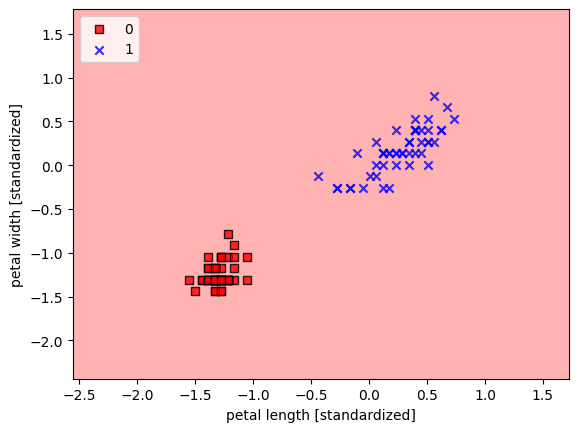

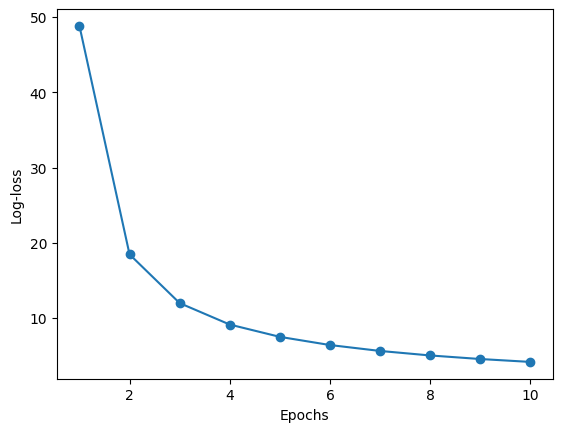

In [8]:
# prompt: allena l'algoritmo usando il dataset dell'iris mostrando i risultati

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Train the model with only two classes (0 and 1)
X_train_01 = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01 = y_train[(y_train == 0) | (y_train == 1)]
X_test_01 = X_test_std[(y_test == 0) | (y_test == 1)]
y_test_01 = y_test[(y_test == 0) | (y_test == 1)]


lrgd = LogisticRegressGD(eta=0.05, n_iter=10, random_state=1)
lrgd.fit(X_train_01, y_train_01)

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

plot_decision_regions(X_combined_std[(y_combined == 0) | (y_combined == 1)],
                      y_combined[(y_combined == 0) | (y_combined == 1)], classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(lrgd.cost_) + 1), lrgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Log-loss')
plt.show()
